# Построение пи-функции последовательности Фибоначчи

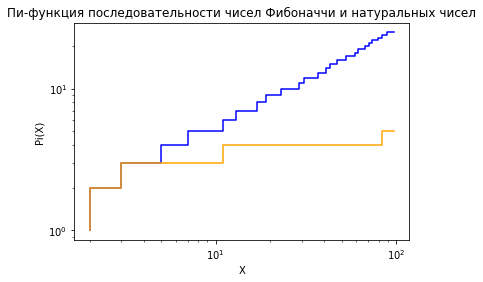

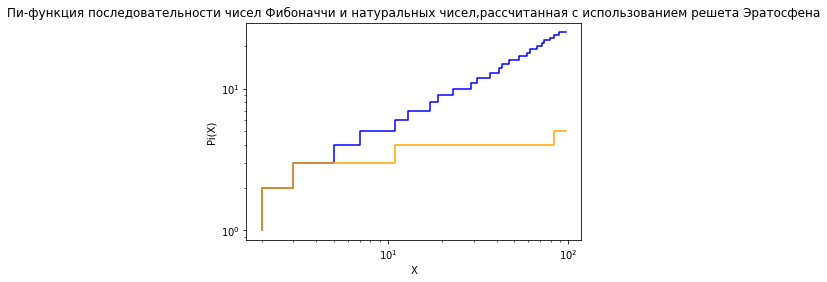

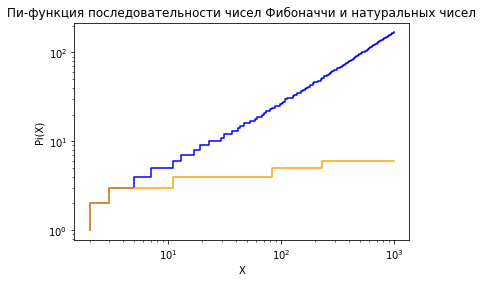

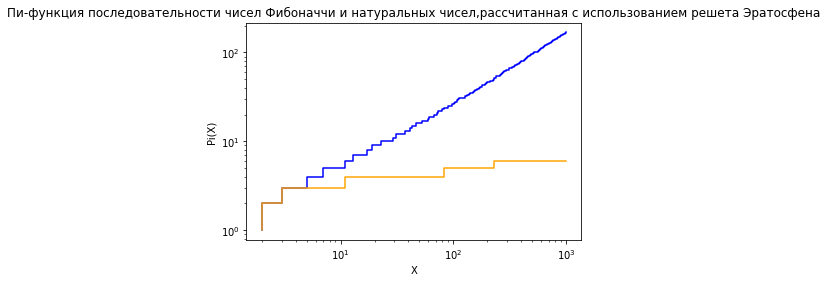

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np

#Функция заполняет пустой массив числами Фибоначчи, не превосходящими заданный супремум
# и возвращает заполненный массив, 
def Fib_numbers_fill(supremum, Fib_array):
    #Сначала разберем отдельно случаи, в которых супремум меньше 2 (тривиальные)
    if supremum < 0:
        return Fib_array
    elif supremum < 1:
        Fib_array.append(0)
        return Fib_array
    elif supremum < 2:
        Fib_array.append(0)
        Fib_array.append(1)
        Fib_array.append(1)
        return Fib_array
    #Основной случай:
    else:
        #Добавляем первые 3 элемента и устанавливаем ими рабочии переменные:
        #последнее число Фибоначчи и 2 предпоследних
        Fib_array.append(0)
        Fib_array.append(1)
        Fib_array.append(1)
        Fib_num_1 = 1
        Fib_num_2 = 1
        Fib_num = 2
        #Пока последнее число не превосходит заданный супремум, добавляем к массиву последнее число
        #затем пересчитываем предпоследние (сдвигом), затем считаем последнее, как их сумму
        while Fib_num <= supremum:
            Fib_array.append(Fib_num)
            Fib_num_1 = Fib_num_2
            Fib_num_2 = Fib_num
            Fib_num = Fib_num_1 + Fib_num_2

        return Fib_array


#Функция проверки числа на простоту
def is_a_prime_number(number):
    #Если число не целое или <= 1, то не простое
    if number <= 1 or isinstance(number, int) == False:
        return False
    is_prime = True

    i = 2
    #обычный поиск делителей, который пробегает до корня из числа
    while i * i <= number:
        if number % i == 0:
            is_prime = False
            break
        i += 1

    return is_prime

#Функция, считающая количество простых чисел в массиве (чисел Фибоначчи)
def count_primes(array):
    count = 0

    for i in range(len(array)):
        if is_a_prime_number(array[i]):
            count += 1

    return count

def sieve_Eratosphene(n):
    sieve = list(range(2, n))
    #print(sieve)
    for i in range(2, int(n**0.5) + 1):
        #print(i)
        if i in sieve:
            for j in range(i * i, n, i):
                if j in sieve:
                    sieve.remove(j)
                #print(j)
            
        
    return sieve

#Функция,считающая количество простых чисел в массиве через решето Эратосфена
def count_primes_by_sieve_Eratosphene(array):
    count = 0
    arr = list(array)
    sieve = sieve_Eratosphene(arr[-1] + 1)
    
    for i in array:
        if i in sieve:
            count += 1
    
    return count


#Функция, которая берет массив чисел Фибоначчи и возвращает массив, с только простыми числами Фибоначчи
#Для того, чтобы создать все точки скачков пи-функции для построения ее ступенчатого графика
def cut_composites(array_Fibb):
    arr_Fib_prime = []
    
    for i in array_Fibb:
        if is_a_prime_number(i):
            arr_Fib_prime.append(i)
    
    return arr_Fib_prime

#Функция, аналогичная cut_composites, но использующая решето Эратосфена
def cut_composites_by_sieve_Eratosphene(array):
    arr_prime = []
    
    sieve = sieve_Eratosphene(array[-1])
    
    for i in array:
        if i in sieve:
            arr_prime.append(i)
        
    return arr_prime

#Функция подсчета значения пи-функции числа
#Создается массив, заполненный числами Фибоначчи, не превосходящими, данное число,
# и затем подсчитывается, сколько из них простые
def Pi_func_Fib(x):
    Fib_numbers = []
    Fib_numbers = Fib_numbers_fill(x, Fib_numbers)
    pi_F = count_primes(Fib_numbers)
    return pi_F

#Функция возвращающая пи-функцию натуральных чисел
def Pi_func(x):
    array = range(2, int(x) + 1)
    pi_f = count_primes(array)
    return pi_f

#Функция, для подсчета пи-функции чисел Фибоначчи, использующая решето Эратосфена
def Pi_func_Fib_using_sieve_Eratosphene(x):
    Fib_numbers = []
    Fib_numbers = Fib_numbers_fill(x, Fib_numbers)
    pi_F = count_primes_by_sieve_Eratosphene(Fib_numbers)
    return pi_F

#Функция, для подсчета пи-функции натуральных чисел, использующая решето Эратосфена
def Pi_func_using_sieve_Eratosphene(x):
    array = range(2, int(x) + 1)
    pi_f = count_primes_by_sieve_Eratosphene(array)
    return pi_f

#Функция построения графика пи-функции (точечный график), максимальное значение аргумента - заданная степень десяти
def pi_func_plot(deg_max):
    x = []
    y = []
    y_Fib = []

    #Генерируются значения аргументов(степени десятки с шагом 0.5), по ним высчитываются их пи-функции
    for i in range(deg_max * 2):#18 possible but slow
        x.append(10**(i / 2))
        y_Fib.append(Pi_func_Fib(x[i]))
        y.append(Pi_func(x[i]))

    print(x)
    print(y)
    #Построение графика, через датафрейм и библиотеку seaborn
    data = pd.DataFrame({
    'x': x,
    'Pi(x)': y,
    'Pi_Fib(x)': y_Fib 
    })
    #data.show()
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='x', y='Pi(x)')
    sns.scatterplot(data=data, x='x', y='Pi_Fib(x)')

    plt.xscale('log')
    plt.yscale('log')

    plt.title('Пи-функция последовательности чисел Фибоначчи и натуральных чисел')
    plt.xlabel('X')
    plt.ylabel('Pi(X)')

    plt.show()
    

#Другое построение графика: ступенчатое, более соответствующее математическому    
def pi_func_plot_2(deg_max):
    x = []
    y = []
    y_Fib = []

    #Аргументы генерируются не как степени десятки, а как простые числа Фибоначчи, на которых происходят скачки
    #x = Fib_numbers_fill(10**deg_max, x)
    x = cut_composites(range(2, 10**deg_max))
    for i in range(len(x)):
        y.append(Pi_func(x[i]))
        y_Fib.append(Pi_func_Fib(x[i]))
    
    '''print(x)
    print(y)
    print(y_Fib)'''

    #Построение
    plt.plot(x, y, drawstyle='steps-pre', label='Pi(x)', color='blue')
    plt.plot(x, y_Fib, drawstyle='steps-pre', label='Pi_Fib(x)', color='orange')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Пи-функция последовательности чисел Фибоначчи и натуральных чисел')
    plt.xlabel('X')
    plt.ylabel('Pi(X)')
    plt.show()
    
def pi_func_plot_2_using_sieve_Eratosphene(deg_max):
    x = []
    y = []
    y_Fib = []

    #Аргументы генерируются не как степени десятки, а как простые числа Фибоначчи, на которых происходят скачки
    #x = Fib_numbers_fill(10**deg_max, x)
    x = cut_composites_by_sieve_Eratosphene(range(2, 10**deg_max))
    for i in range(len(x)):
        y.append(Pi_func_using_sieve_Eratosphene(x[i]))
        y_Fib.append(Pi_func_Fib_using_sieve_Eratosphene(x[i]))
    
    '''print(x)
    print(y)
    print(y_Fib)'''

    #Построение
    plt.plot(x, y, drawstyle='steps-pre', label='Pi(x)', color='blue')
    plt.plot(x, y_Fib, drawstyle='steps-pre', label='Pi_Fib(x)', color='orange')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Пи-функция последовательности чисел Фибоначчи и натуральных чисел,рассчитанная с использованием решета Эратосфена')
    plt.xlabel('X')
    plt.ylabel('Pi(X)')
    plt.show()

    

#pi_func_plot(5)#18 possible but slow
pi_func_plot_2(2)
pi_func_plot_2_using_sieve_Eratosphene(2)
pi_func_plot_2(3)
pi_func_plot_2_using_sieve_Eratosphene(3)
#pi_func_plot_2(6)
#pi_func_plot_2(8)#для 9 долго считает, график для 8 почти не отличается от 6


    
    



# Завсиимость времени построения графика, от максимального аргумента пи-функции

Время выполнения: 0.0000 секунд
Время выполнения: 0.0000 секунд
Время выполнения: 0.0000 секунд
Время выполнения: 0.0000 секунд
Время выполнения: 0.0000 секунд
Время выполнения: 0.0000 секунд
Время выполнения: 0.0000 секунд
Время выполнения: 0.0000 секунд
Время выполнения: 0.0000 секунд
Время выполнения: 0.0000 секунд
Время выполнения: 0.0001 секунд
Время выполнения: 0.0001 секунд
Время выполнения: 0.0001 секунд
Время выполнения: 0.0001 секунд
Время выполнения: 0.0001 секунд
Время выполнения: 0.0004 секунд
Время выполнения: 0.0004 секунд
Время выполнения: 0.0004 секунд
Время выполнения: 0.0004 секунд
Время выполнения: 0.0004 секунд
Время выполнения: 0.0033 секунд
Время выполнения: 0.0026 секунд
Время выполнения: 0.0026 секунд
Время выполнения: 0.0027 секунд
Время выполнения: 0.0027 секунд
Время выполнения: 0.1066 секунд
Время выполнения: 0.0987 секунд
Время выполнения: 0.0960 секунд
Время выполнения: 0.0945 секунд
Время выполнения: 0.0976 секунд
Время выполнения: 5.4912 секунд
Время вы

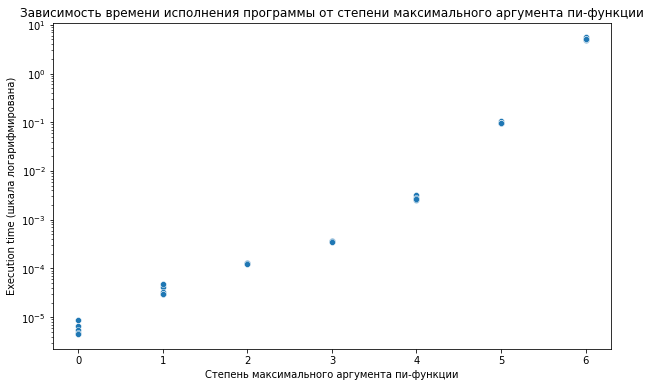

In [35]:
#Функция, производящаяя, все действия функции строящей график, кроме самого построения
# и считающая затраченное время
def pi_func_plot_time_measure(deg_max):
    start_time = time.time()
    x = []
    y = []
    y_Fib = []

    #Аргументы генерируются не как степени десятки, а как простые числа Фибоначчи, на которых происходят скачки
    x = Fib_numbers_fill(10**deg_max, x)
    x = cut_composites(x)
    for i in range(len(x)):
        y.append(Pi_func(x[i]))
        y_Fib.append(Pi_func_Fib(x[i]))

    end_time = time.time()  

    execution_time = end_time - start_time
    print(f"Время выполнения: {execution_time:.4f} секунд")

    return execution_time

    

    
#Функция, которая строит зависимость времени выполнения построения графика пи-функции
#от степени максимального его аргумента
def plot_execution_time(deg_max):
    deg = []
    ex_time = []
    for i in range(deg_max + 1):
        deg.append(i)
        deg.append(i)
        deg.append(i)
        deg.append(i)
        deg.append(i)
        ex_t_1 = pi_func_plot_time_measure(i)
        ex_t_2 = pi_func_plot_time_measure(i)
        ex_t_3 = pi_func_plot_time_measure(i)
        ex_t_4 = pi_func_plot_time_measure(i)
        ex_t_5 = pi_func_plot_time_measure(i)
        #print("Время выполнения программы " + str(ex_t) + " секунд")
        #ex_time.append((ex_t_1 + ex_t_2 + ex_t_3 + ex_t_4 + ex_t_5) / 5)
        ex_time.append(ex_t_1)
        ex_time.append(ex_t_2)
        ex_time.append(ex_t_3)
        ex_time.append(ex_t_4)
        ex_time.append(ex_t_5)

    data = pd.DataFrame({
    'deg x': deg,
    'Execution_time': ex_time
    })

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='deg x', y='Execution_time')

    plt.yscale('log')

    plt.title('Зависимость времени исполнения программы от степени максимального аргумента пи-функции')
    plt.xlabel('Степень максимального аргумента пи-функции')
    plt.ylabel('Execution time (шкала логарифмирована)')

    plt.show()
        
plot_execution_time(6)
    


    
    


In [18]:
#Тут я просто немного поэкспериментрировал с распараллеливанием в другой задаче
def func(x):
    sum = 0
    for i in range(x):
        sum += i

    return sum


#print(func(1000000))

import time

time_0 = time.time()
for i in range(1000, 3000000, 10000):
    t = func(i)
time_1 = time.time()
print(time_1 - time_0)

from multiprocessing import Process

time_0 = time.time()

p = [Process(target = func, args = (i,)) for i in range(1000, 3000000, 10000)]
for i in p:
    i.start()
for i in p:
    i.join()

time_1 = time.time()
print(time_1 - time_0)

40.94188475608826
26.116021156311035


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Функция заполняет пустой массив числами Фибоначчи, не превосходящими заданный супремум
# и возвращает заполненный массив, 
def Fib_numbers_fill(supremum, Fib_array):
    #Сначала разберем отдельно случаи, в которых супремум меньше 2 (тривиальные)
    if supremum < 0:
        return Fib_array
    elif supremum < 1:
        Fib_array.append(0)
        return Fib_array
    elif supremum < 2:
        Fib_array.append(0)
        Fib_array.append(1)
        Fib_array.append(1)
        return Fib_array
    #Основной случай:
    else:
        #Добавляем первые 3 элемента и устанавливаем ими рабочии переменные:
        #последнее число Фибоначчи и 2 предпоследних
        Fib_array.append(0)
        Fib_array.append(1)
        Fib_array.append(1)
        Fib_num_1 = 1
        Fib_num_2 = 1
        Fib_num = 2
        #Пока последнее число не превосходит заданный супремум, добавляем к массиву последнее число
        #затем пересчитываем предпоследние (сдвигом), затем считаем последнее, как их сумму
        while Fib_num <= supremum:
            Fib_array.append(Fib_num)
            Fib_num_1 = Fib_num_2
            Fib_num_2 = Fib_num
            Fib_num = Fib_num_1 + Fib_num_2

        return Fib_array


#Функция проверки числа на простоту
def is_a_prime_number(number):
    #Если число не целое или <= 1, то не простое
    if number <= 1 or isinstance(number, int) == False:
        return False
    is_prime = True

    i = 2
    #обычный поиск делителей, который пробегает до корня из числа
    while i * i <= number:
        if number % i == 0:
            is_prime = False
            break
        i += 1

    return is_prime

#Функция, считающая количество простых чисел в массиве (чисел Фибоначчи)
def count_primes(array):
    count = 0

    for i in range(len(array)):
        if is_a_prime_number(array[i]):
            count += 1

    return count

#Функция, которая берет массив чисел Фибоначчи и возвращает массив, с только простыми числами Фибоначчи
#Для того, чтобы создать все точки скачков пи-функции для построения ее ступенчатого графика
def cut_composites(array_Fibb):
    arr_Fib_prime = []
    
    for i in array_Fibb:
        if is_a_prime_number(i):
            arr_Fib_prime.append(i)
    
    return arr_Fib_prime

#Функция подсчета значения пи-функции числа
#Создается массив, заполненный числами Фибоначчи, не превосходящими, данное число,
# и затем подсчитывается, сколько из них простые
def Pi_func(x):
    Fib_numbers = []
    Fib_numbers = Fib_numbers_fill(x, Fib_numbers)
    pi_F = count_primes(Fib_numbers)
    return pi_F



# Проверка, на то быстрее ли будет программа, если проверка на простоту будет проверяться параллельно для нескольких чисел

In [4]:
from multiprocessing import Process
import time



x = []
x = Fib_numbers_fill(10**16, x)
#print(x)

time_0 = time.time()
p = [Process(target = is_a_prime_number, args = (i,)) for i in x]
for i in p:
    i.start()
for i in p:
    i.join()
    
time_1 = time.time()
print("Проверка параллельным вычислением")
print(time_1 - time_0)

time_0 = time.time()
for i in x:
    l = is_a_prime_number(i)
    
time_1 = time.time()
print("Проверка простым циклом")
print(time_1 - time_0)

    

Проверка параллельным вычислением
3.0542359352111816
Проверка простым циклом
2.640655040740967


Написать проверку на простоту решетом Эратосфена, написать пи-функцию простых чисел, сделать множественные измерения времени исполнения с усреднением, вставить распараллеливание проверки простых чисел

# Решето Эратосфена

In [27]:
#import math
def sieve_Eratosphene(n):
    sieve = list(range(2, n))
    #print(sieve)
    for i in range(2, int(n**0.5) + 1):
        #print(i)
        if i in sieve:
            for j in range(i * i, n, i):
                if j in sieve:
                    sieve.remove(j)
                #print(j)
            
        
    return sieve

print(sieve_Eratosphene(6))
print(sieve_Eratosphene(10000))

[2, 3, 5]
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213